# IMDB Dataset Exploratory Data Analysis
Process:
1. Download & extract IMDB Dataset
2. Explore dataset files to find best way to read them, assign data types, and deal with issues
3. Create a Data Preparation pipeline that reads data in a way that is suitable for statistical analysis tasks.
4. Perform EDA
  - Summary statistics
  - Data Visualization
  - Show Findings and Insights

For more information read The [Tutorial](https://therational.ist/about/projects/imdb-eda/) for Exploratory Data Analysis (EDA) of IMDB Dataset.


# Initial Exploration and Preparation
This is where we first look at the data we will be dealing with, then decide how to prepare for reading it.
Basically this stage is a predecesor for creating a Data Praparation Pipeling.

## Importing libraries and functions

In [ ]:
# Importing Libraries
import os, csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm.auto import tqdm
from IPython.display import display

# Sample data
def display_sample(df,n=5):
  """Displays a sample of the dataframe, including head, tail, and a random sample.
  Args:
      df: The pandas dataframe to display a sample of.
      n: (Optional) The number of rows to include in the random sample
          (default: 5).
  """
  display(pd.concat([df.head(), df.sample(n=n), df.tail()]))

# Show unique values in specific columns of a dataframe
def show_unique_cols(df, columns):
  """Show unique values in specific columns inside a dataframe
  Args:
      df: The pandas dataframe.
      columns: A list of column names
  """
  uniuque_series = pd.Series({c: df[c].unique() for c in columns})
  for row in columns:
    print(f"Unique values for '{row}' row:\n{uniuque_series[row]}\n")

dir_path = "/content/Datasets/IMDB"

## Downloading IMDB Dataset
All files are downloaded into "Dataset/IMDB" directory in google drive. Then they are extracted.

In [ ]:
# Download with progressbar
def download(url, path):
  import math
  import requests
  from tqdm.auto import tqdm

  r = requests.get(url, stream=True, allow_redirects=True)
  total_size = int(r.headers.get("content-length", 0))
  block_size = 1024
  with open(path, "wb") as f:
    for data in tqdm(r.iter_content(block_size), total=math.ceil(total_size // block_size), unit="KB", unit_scale=True, desc=f"Downloading `{url}`"):
      f.write(data)

# Download & Extract dataset if it doens't exist
def get_dataset(url, dir_path, file):
  import gzip, shutil

  file_path = os.path.join(dir_path, file)
  extracted_file, extracted_file_path = file[:-3], file_path[:-3] # -4 removes `.gz` from end of file
  # Setup Dataset Directory
  if not os.path.exists(dir_path):
    from pathlib import Path
    Path(dir_path).mkdir(parents=True, exist_ok=True)
  # Download compressed
  if not os.path.isfile(file_path):
    if os.path.exists(extracted_file_path):
      print(f"Extracted version of file(`{extracted_file}`) already exists, skipping to next download.")
    else:
      download(url, file_path)
  else:
    print(f"file `{file}` already exists, skipping to next download.")
  # Extract Compressed
  if not os.path.isfile(extracted_file_path):
    print(f"Extracting `{file}` into `{extracted_file}.")
    with gzip.open(file_path, 'rb') as f_in:
      with open(extracted_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
  else:
    print(f"file `{extracted_file_path}` already exists, skipping to next.")


# Setup download parameters
url = "https://datasets.imdbws.com/"
files = ["title.ratings.tsv.gz", "title.basics.tsv.gz", "name.basics.tsv.gz", "title.akas.tsv.gz", "title.crew.tsv.gz", "title.episode.tsv.gz", "title.principals.tsv.gz"]
# download files
for file in files:
  get_dataset(f"{url}{file}", dir_path, file)


Extracting `title.ratings.tsv.gz` into `title.ratings.tsv.


Extracting `title.basics.tsv.gz` into `title.basics.tsv.


Extracting `name.basics.tsv.gz` into `name.basics.tsv.


Extracting `title.akas.tsv.gz` into `title.akas.tsv.


Extracting `title.crew.tsv.gz` into `title.crew.tsv.


Extracting `title.episode.tsv.gz` into `title.episode.tsv.


Extracting `title.principals.tsv.gz` into `title.principals.tsv.


## Exploring `title.basics.tsv` file

In [ ]:
# Reading the file
path = os.path.join(dir_path, "title.basics.tsv")
media_df = pd.read_csv(path, sep='\t', low_memory=False)

In [ ]:
media_df.info()
display_sample(media_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10611772 entries, 0 to 10611771
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 728.7+ MB


tconst  titleType               primaryTitle  \
0          tt0000001      short                 Carmencita   
1          tt0000002      short     Le clown et ses chiens   
2          tt0000003      short             Pauvre Pierrot   
3          tt0000004      short                Un bon bock   
4          tt0000005      short           Blacksmith Scene   
9171688    tt6768694  tvEpisode      All-American Classics   
2381415   tt12564306  tvEpisode        Atrapados en la red   
967239     tt0999260  tvEpisode               Inconsolable   
6132082   tt25009400  tvEpisode                     Played   
7987830    tt4097104  tvEpisode         El león y su presa   
10611767   tt9916848  tvEpisode              Episode #3.17   
10611768   tt9916850  tvEpisode              Episode #3.19   
10611769   tt9916852  tvEpisode              Episode #3.20   
10611770   tt9916856      short                   The Wind   
10611771   tt9916880  tvEpisode  Horrid Henry Knows It All   

                      originalTitle isAdult startYear endYear runtimeMinutes  \
0                        Carmencita       0      1894      \N              1   
1            Le clown et ses chiens       0      1892      \N              5   
2                    Pauvre Pierrot       0      1892      \N              4   
3                       Un bon bock       0      1892      \N             12   
4                  Blacksmith Scene       0      1893      \N              1   
9171688       All-American Classics       0      2017      \N             42   
2381415         Atrapados en la red       0      2016      \N             \N   
967239                 Inconsolable       0      2006      \N             \N   
6132082                      Played       0      2019      \N             \N   
7987830          El león y su presa       0      2014      \N             \N   
10611767              Episode #3.17       0      2009      \N             \N   
10611768              Episode #3.19       0      2010      \N             \N   
10611769              Episode #3.20       0      2010      \N             \N   
10611770                   The Wind       0      2015      \N             27   
10611771  Horrid Henry Knows It All       0      2014      \N             10   

                              genres  
0                  Documentary,Short  
1                    Animation,Short  
2           Animation,Comedy,Romance  
3                    Animation,Short  
4                       Comedy,Short  
9171688                   Reality-TV  
2381415                       Comedy  
967239                 Drama,Romance  
6132082                       Comedy  
7987830                        Drama  
10611767         Action,Drama,Family  
10611768         Action,Drama,Family  
10611769         Action,Drama,Family  
10611770                       Short  
10611771  Adventure,Animation,Comedy

## Discovering unique values and types
Here I've listed columns which should have limmited number of unique values to decide on best data types for them. however I discovered issues in some columns. for example 'runtimeMinutes' contains strings which should be in 'genre' column.

In [ ]:
uniuque_cols = ['titleType', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']
show_unique_cols(media_df, uniuque_cols)

Unique values for 'titleType' row:
['short' 'movie' 'tvShort' 'tvMovie' 'tvSeries' 'tvEpisode' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame' 'tvPilot']

Unique values for 'isAdult' row:
['0' '1' '2019' '1981' '2020' '2017' '\\N' '2023' '2022' '2011' '2014'
 '2005']

Unique values for 'startYear' row:
['1894' '1892' '1893' '1895' '1896' '1898' '1897' '1900' '1899' '1901'
 '1902' '1903' '1905' '1904' '1912' '1907' '1906' '1908' '1910' '1909'
 '\\N' '1911' '1990' '1914' '1913' '1915' '1919' '1916' '1917' '1918'
 '1936' '1925' '1922' '1920' '1921' '1923' '1924' '1928' '2019' '2021'
 '1926' '1927' '1929' '2000' '1993' '1935' '1930' '1942' '1934' '1931'
 '1932' '1939' '1937' '1933' '1950' '1938' '1951' '1945' '1946' '1940'
 '1944' '1949' '1947' '1941' '1952' '1970' '1957' '1943' '1959' '1948'
 '2001' '1953' '1954' '1965' '1983' '1980' '1973' '1961' '1995' '1955'
 '1962' '1958' '1956' '1960' '1977' '2024' '1964' '2012' '1967' '1968'
 '1963' '1988' '1986' '1971' '1969' '1972' '1966' '2023' '

Here I identified rows with this issue to check the raw file.

Checking the raw 'tsv' file shows that these are rows with title columns starting with quote mark. For example:
```tsv
tt10233364	tvEpisode	"Rolling in the Deep Dish	"Rolling in the Deep Dish	0	2019	\N	\N	Reality-TV
```
In this row the tab separating `primaryTitle` and `originalTitle` is ignored because it's between quote mark. therefore two columns are considered one and the rest of columns are pushed left.

In [ ]:
runtime = media_df['runtimeMinutes'].replace("\\N", 0)
media_df[pd.to_numeric(runtime, errors='coerce').isna()]

tconst  titleType  \
1097016   tt10233364  tvEpisode   
1506763   tt10970874  tvEpisode   
1894222   tt11670006  tvEpisode   
2005080   tt11868642  tvEpisode   
2158999   tt12149332  tvEpisode   
2303905   tt12415330  tvEpisode   
2990499   tt13704268  tvEpisode   
6452925   tt27147391  tvEpisode   
6505815   tt27404292  tvEpisode   
6542499   tt27493617  tvEpisode   
6542533   tt27493772  tvEpisode   
6610131   tt27675642  tvEpisode   
6808079   tt28325562  tvEpisode   
6873770   tt28535095  tvEpisode   
7001974   tt29081018  tvEpisode   
7936802    tt3984412  tvEpisode   
10567939   tt9822816  tvEpisode   
10607707   tt9909210  tvEpisode   

                                               primaryTitle originalTitle  \
1097016   Rolling in the Deep Dish\tRolling in the Deep ...             0   
1506763   Die Bauhaus-Stadt Tel Aviv - Vorbild für die M...             0   
1894222   ...ein angenehmer Unbequemer...\t...ein angene...             0   
2005080   GGN Heavyweight Championship Lungs With Mike T...             0   
2158999   Jeopardy! College Championship Semifinal Game ...             0   
2303905   Anthony Davis High Brow Tank\tAnthony Davis Hi...             0   
2990499   Bay of the Triffids/Doctor of Doom\tBay of the...             0   
6452925   LATINO Accents QUIZ! w@MrHReviews @EchoBaseNet...             0   
6505815   Nord-Koreas röda prinsessa\tNord-Koreas röda p...             0   
6542499   War Room Round Table: Building an AI Networkin...             0   
6542533   War Room Round Table: The 1 Year Anniversary E...             0   
6610131   It's not our fault! Bud Light boss LIES about ...             0   
6808079                Eine Oma auf Bali\tEine Oma auf Bali             0   
6873770          I'm into Sharif Boys\tI'm into Sharif Boys             0   
7001974    Art Brings People Close\tArt Brings People Close             1   
7936802   I'm Not Going to Come Last, I'm Just Going to ...             0   
10567939  Zwischen Vertuschung und Aufklärung - Missbrau...             0   
10607707  Politik und/oder Moral - Wie weit geht das Ver...             0   

         isAdult startYear endYear              runtimeMinutes genres  
1097016     2019        \N      \N                  Reality-TV    NaN  
1506763     2019        \N      \N                   Talk-Show    NaN  
1894222     1981        \N      \N                 Documentary    NaN  
2005080     2020        \N      \N                   Talk-Show    NaN  
2158999     2020        \N      \N  Game-Show,Reality-TV,Short    NaN  
2303905     2017        \N      \N                  Reality-TV    NaN  
2990499       \N        \N      \N     Animation,Comedy,Family    NaN  
6452925     2023        \N      \N              News,Talk-Show    NaN  
6505815     2022        \N      \N                 Documentary    NaN  
6542499     2023        \N      \N                   Talk-Show    NaN  
6542533     2023        \N      \N                   Talk-Show    NaN  
6610131     2023        \N      \N       Comedy,News,Talk-Show    NaN  
6808079     2011        \N      \N      Documentary,Reality-TV    NaN  
6873770     2023        \N      \N                  Reality-TV    NaN  
7001974     2023        \N      \N                       Adult    NaN  
7936802     2014        \N      \N        Game-Show,Reality-TV    NaN  
10567939    2019        \N      \N                   Talk-Show    NaN  
10607707    2005        \N      \N                   Talk-Show    NaN

# Reading Data & Data Praparation

## Reading `title.basics`
Here we'll read the file again and fix the issues we found and optimize it by giving it correct column types.
This change, will make following improvements:
- Because of setting proper types less memory is used and performing manipulation will be slighly faster.
- All `\\N` values are replaced with NA.
- issue of merging columns because of quote mark is resolved thanks to `quoting=csv.QUOTE_NONE` parameter.

In [ ]:
path = os.path.join(dir_path, "title.basics.tsv")
media_df = pd.read_csv(path, sep='\t', encoding="utf-8", low_memory=False, dtype={4:pd.Int8Dtype(), 5:pd.Int16Dtype(), 6:pd.Int16Dtype(),7:pd.Int32Dtype()}, na_values=["\\N"], quoting=csv.QUOTE_NONE)

In [ ]:
media_df.info()
show_unique_cols(media_df, ['titleType', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10613322 entries, 0 to 10613321
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         Int8  
 5   startYear       Int16 
 6   endYear         Int16 
 7   runtimeMinutes  Int32 
 8   genres          object
dtypes: Int16(2), Int32(1), Int8(1), object(5)
memory usage: 536.4+ MB
Unique values for 'titleType' row:
['short' 'movie' 'tvShort' 'tvMovie' 'tvSeries' 'tvEpisode' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame' 'tvPilot']

Unique values for 'isAdult' row:
<IntegerArray>
[0, 1]
Length: 2, dtype: Int8

Unique values for 'startYear' row:
<IntegerArray>
[1894, 1892, 1893, 1895, 1896, 1898, 1897, 1900, 1899, 1901,
 ...
 1882, 1881, 2030, 1887, 2029, 2028, 1874, 1883, 2031, 1885]
Length: 153, dtype: Int16

Unique values for 'endYear' row:
<IntegerArray>
[<NA>, 1947, 1945, 19

## Preparing `title.crew.tsv` and `title.ratings.tsv`
Now we should be working on other files to read them as dataframes and perform data-preparation to make future analysis tasks easier.

In [ ]:
# Read Crew and Rating files.
path = os.path.join(dir_path, "title.crew.tsv")
crew_df = pd.read_csv(path, sep='\t', encoding="utf-8", low_memory=False, na_values=["\\N"])
path = os.path.join(dir_path, "title.ratings.tsv")
rating_df = pd.read_csv(path, sep='\t', encoding="utf-8", low_memory=False, na_values=["\\N"], dtype={1:pd.Float32Dtype(), 2:pd.Int32Dtype()})

Here, We'll be merging two dataframes because of their one-to-one relations.

In [ ]:
media_df = media_df.merge(crew_df,on='tconst').merge(rating_df,on='tconst')

In [ ]:
# delete the old dataframe to release memory.
lst = [crew_df, rating_df]
del crew_df, rating_df
del lst

In [ ]:
# Replace unique values 0, 1 with true and falase
media_df['isAdult'] = media_df['isAdult'].map({0: False, 1:True})

Finally I want to conver the `genre`, `directors`, and `writers` columns containing comma seperated string into a list. This will be useful if we want to analyse frequencies such as most popular genre or find most prolific actors or directors.

Example:

'Documentary,Short' -> ['Documentary', 'Short']

In [ ]:
media_df['genres'] = media_df['genres'].str.split(',')
media_df['directors'] = media_df['directors'].str.split(',')
media_df['writers'] = media_df['writers'].str.split(',')
media_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411825 entries, 0 to 1411824
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1411825 non-null  object 
 1   titleType       1411825 non-null  object 
 2   primaryTitle    1411825 non-null  object 
 3   originalTitle   1411825 non-null  object 
 4   isAdult         1411825 non-null  bool   
 5   startYear       1411586 non-null  Int16  
 6   endYear         52532 non-null    Int16  
 7   runtimeMinutes  1000919 non-null  Int32  
 8   genres          1391596 non-null  object 
 9   directors       1185424 non-null  object 
 10  writers         1086558 non-null  object 
 11  averageRating   1411825 non-null  Float32
 12  numVotes        1411825 non-null  Int32  
dtypes: Float32(1), Int16(2), Int32(2), bool(1), object(7)
memory usage: 115.8+ MB


## Preparing Other Files
Reading episode, aka files related to media, and name(name.basics) and roles(principals) files.

If you lack the memory ro read all this data, you can only read the files required to run specific tasks.

In [ ]:
path = os.path.join(dir_path, "title.episode.tsv")
episode_df = pd.read_csv(path, sep='\t', encoding="utf-8", na_values=["\\N"], dtype={2:pd.Int32Dtype(), 3:pd.Int32Dtype()})

In [ ]:
path = os.path.join(dir_path, "title.akas.tsv")
'''
# Read all file data
aka_df = pd.read_csv(path, sep='\t', encoding="utf-8", na_values=["\\N"], dtype={7:pd.Int8Dtype()}, quoting=csv.QUOTE_NONE, low_memory=False)
aka_df['isOriginalTitle'] = aka_df['isOriginalTitle'].dropna().map({0: False, 1:True})
aka_df['types'] = aka_df['types'].str.split('\x02')
aka_df['attributes'] = aka_df['attributes'].str.split('\x02')
'''
# Read selected columns which are used (Memory-efficient)
aka_df = pd.read_csv(path, sep='\t', encoding="utf-8", na_values=["\\N"], usecols=["titleId", "region","language"], quoting=csv.QUOTE_NONE, low_memory=False)


In [ ]:
path = os.path.join(dir_path, "name.basics.tsv")
'''
# Read all columns
name_df = pd.read_csv(path, sep='\t', encoding="utf-8", na_values=["\\N"], dtype={2:pd.Int16Dtype(), 3:pd.Int16Dtype()})
name_df['primaryProfession'] = name_df['primaryProfession'].str.split(',')
'''
# Read selected columns which are used (Memory-efficient)
name_df = pd.read_csv(path, sep='\t', encoding="utf-8", na_values=["\\N"], usecols=["nconst", "primaryName", "birthYear", "deathYear"], dtype={2:pd.Int16Dtype(), 3:pd.Int16Dtype()})

In [ ]:
path = os.path.join(dir_path, "title.principals.tsv")
principals_df = pd.read_csv(path, sep='\t', encoding="utf-8", na_values=["\\N"], usecols=["tconst", "nconst", "category", "job"])

# Summary Statistics and Data Exploration
This section includes three major tasks:
- Summary Statistics
- Data Visualizations
- Findings and Insights

## Media Types

In [ ]:
title_type_counts = media_df['titleType'].value_counts()

fig = go.Figure(data=[go.Pie(labels=title_type_counts.index, values=title_type_counts.values)])
fig.update_layout(title_text="Media Type Distribution")
fig.show()

## Genres

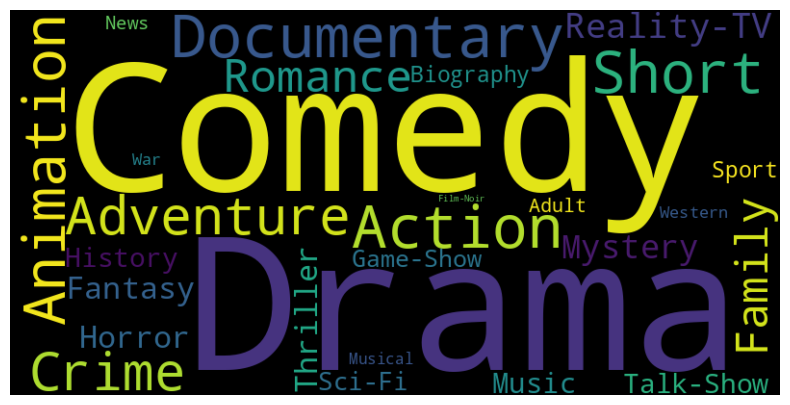

In [ ]:
# Genre WordCloud
from wordcloud import WordCloud

genre_frequencies = media_df['genres'].explode().value_counts()

wordcloud = WordCloud(width = 800, height = 400)
wordcloud.generate_from_frequencies(genre_frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Simple bar chart plot to visualize the frequency of genres
genres = media_df['genres'].explode().value_counts().index.tolist()
genres_counts = media_df['genres'].explode().value_counts().values
df = pd.DataFrame({'genres': genres, 'genres_counts': genres_counts})

fig = px.bar(df, x="genres_counts", y="genres",height=700, orientation='h')
fig.show()

## Ratings

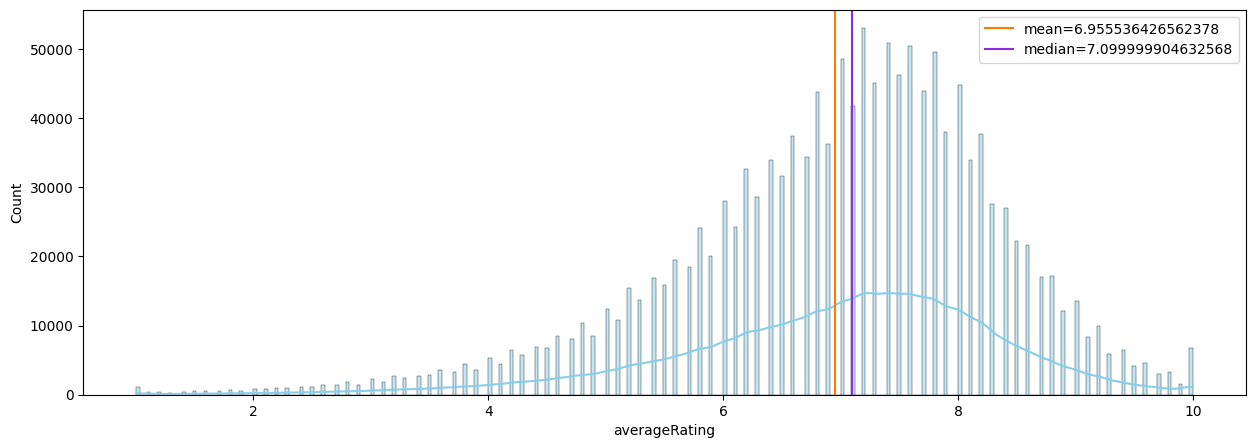

In [ ]:
# KDE Distribution of ratings using a histogram plot
rating_mean, ratings_median = media_df.averageRating.mean(), media_df.averageRating.median()

plt.figure(figsize=(15,5))
ax = sns.histplot(media_df.averageRating, kde=True, color='skyblue')
ax.axvline(x=rating_mean,color=sns.color_palette("bright")[1],label=f"mean={rating_mean}")
ax.axvline(x=ratings_median,color=sns.color_palette("bright")[4],label=f"median={ratings_median}")

plt.legend()
plt.show()

In [ ]:
# 10 media with highest number of votes
media_df.sort_values(by='numVotes', ascending=False).head(10)[['primaryTitle', 'startYear', 'numVotes', 'averageRating', 'genres']]

primaryTitle  startYear  numVotes  averageRating  \
83033   The Shawshank Redemption       1994   2867526            9.3   
253473           The Dark Knight       2008   2849163            9.0   
657426                 Inception       2010   2530449            8.8   
99676                 Fight Club       1999   2302931            8.8   
441616           Game of Thrones       2011   2264927            9.2   
81935               Forrest Gump       1994   2238890            8.8   
82816               Pulp Fiction       1994   2202278            8.9   
430679              Breaking Bad       2008   2113375            9.5   
402453              Interstellar       2014   2071614            8.7   
97482                 The Matrix       1999   2037531            8.7   

                             genres  
83033                       [Drama]  
253473       [Action, Crime, Drama]  
657426  [Action, Adventure, Sci-Fi]  
99676                       [Drama]  
441616   [Action, Adventure, Drama]  
81935              [Drama, Romance]  
82816                [Crime, Drama]  
430679     [Crime, Drama, Thriller]  
402453   [Adventure, Drama, Sci-Fi]  
97482              [Action, Sci-Fi]

In [ ]:
# 10 highest rated movies with more than 10000 voters
media_df[(media_df['numVotes'] > 10000) & (media_df['titleType']=="movie")].sort_values(by='averageRating', ascending=False).head(10)[['primaryTitle', 'numVotes', 'averageRating', 'genres']]

primaryTitle  numVotes  \
1004587                                    Uruttu Tech     10757   
83033                         The Shawshank Redemption   2867526   
781562                         The Silence of Swastika     10506   
156635                                 The Chaos Class     42804   
159853             Ramayana: The Legend of Prince Rama     14349   
46612                                    The Godfather   1997496   
943059                                       12th Fail    102662   
966575                          CM101MMXI Fundamentals     47168   
115345   The Lord of the Rings: The Return of the King   1964365   
80438                                 Schindler's List   1440445   

         averageRating                          genres  
1004587            9.5                        [Comedy]  
83033              9.3                         [Drama]  
781562             9.3          [Documentary, History]  
156635             9.2                 [Comedy, Drama]  
159853             9.2  [Action, Adventure, Animation]  
46612              9.2                  [Crime, Drama]  
943059             9.1              [Biography, Drama]  
966575             9.1           [Comedy, Documentary]  
115345             9.0      [Action, Adventure, Drama]  
80438              9.0     [Biography, Drama, History]

In [ ]:
# Popularity - Top 10 Media through Sort
media_df.sort_values(by=['numVotes', 'averageRating'], ascending=[False, False])[['primaryTitle', 'numVotes', 'averageRating', 'genres']].head(10)

primaryTitle  numVotes  averageRating  \
83033   The Shawshank Redemption   2867526            9.3   
253473           The Dark Knight   2849163            9.0   
657426                 Inception   2530449            8.8   
99676                 Fight Club   2302931            8.8   
441616           Game of Thrones   2264927            9.2   
81935               Forrest Gump   2238890            8.8   
82816               Pulp Fiction   2202278            8.9   
430679              Breaking Bad   2113375            9.5   
402453              Interstellar   2071614            8.7   
97482                 The Matrix   2037531            8.7   

                             genres  
83033                       [Drama]  
253473       [Action, Crime, Drama]  
657426  [Action, Adventure, Sci-Fi]  
99676                       [Drama]  
441616   [Action, Adventure, Drama]  
81935              [Drama, Romance]  
82816                [Crime, Drama]  
430679     [Crime, Drama, Thriller]  
402453   [Adventure, Drama, Sci-Fi]  
97482              [Action, Sci-Fi]

In [ ]:
# 10 highest rated media, regardless of number of votes
display(media_df.sort_values(by='averageRating', ascending=False).head(10)[['primaryTitle', 'runtimeMinutes', 'genres']])

primaryTitle  runtimeMinutes  \
1132883                                      Episode #11.8            <NA>   
1045446                                       Episode #2.3            <NA>   
999419                          Make an Interactive Design            <NA>   
1367227        Behind the Scenes of "Meathook Massacre IV"            <NA>   
853230         Xmastravaganza: QUIZarenaLIVE Special Event            <NA>   
853231   QUIZarenaLIVE: NYE Special 2021 A Year in Hind...             103   
1311559                    Indian Martial Arts: Ek Itihaas            <NA>   
606965                                        Episode #1.1            <NA>   
1367240                                     Keith and Chad              33   
1224194                                           Order 66               6   

                                 genres  
1132883                   [Documentary]  
1045446                         [Sport]  
999419   [Animation, Comedy, Talk-Show]  
1367227               [News, Talk-Show]  
853230                      [Game-Show]  
853231                      [Talk-Show]  
1311559                   [Documentary]  
606965                 [Drama, Romance]  
1367240         [Action, Comedy, Short]  
1224194                [Action, Comedy]

In [ ]:
# Most loved and hated movies, with highest positive number representing most loved media and lowest negative score showing most hated media
# to calculate "score" we transform "averageRating" from 1 to 10 into values into -1 to 1, then multiplies it with number of votes.
media_df['score'] = ((2 * media_df['averageRating'] - 11) / 9) * media_df['numVotes']
display(media_df.sort_values(by='score', ascending=False))

tconst  titleType              primaryTitle  \
83039     tt0111161      movie  The Shawshank Redemption   
253495    tt0468569      movie           The Dark Knight   
430707    tt0903747   tvSeries              Breaking Bad   
441646    tt0944947   tvSeries           Game of Thrones   
657502    tt1375666      movie                 Inception   
...             ...        ...                       ...   
1234603   tt6027920  tvEpisode           The Iron Throne   
1331436   tt7886848      movie                   Sadak 2   
930130    tt2322441      movie      Fifty Shades of Grey   
89108     tt0118688      movie            Batman & Robin   
506872   tt10888594      movie                     Radhe   

                    originalTitle  isAdult  startYear  endYear  \
83039    The Shawshank Redemption    False       1994     <NA>   
253495            The Dark Knight    False       2008     <NA>   
430707               Breaking Bad    False       2008     2013   
441646            Game of Thrones    False       2011     2019   
657502                  Inception    False       2010     <NA>   
...                           ...      ...        ...      ...   
1234603           The Iron Throne    False       2019     <NA>   
1331436                   Sadak 2    False       2020     <NA>   
930130       Fifty Shades of Grey    False       2015     <NA>   
89108              Batman & Robin    False       1997     <NA>   
506872                      Radhe    False       2021     <NA>   

         runtimeMinutes                       genres  \
83039               142                      [Drama]   
253495              152       [Action, Crime, Drama]   
430707               45     [Crime, Drama, Thriller]   
441646               55   [Action, Adventure, Drama]   
657502              148  [Action, Adventure, Sci-Fi]   
...                 ...                          ...   
1234603              80   [Action, Adventure, Drama]   
1331436             133              [Action, Drama]   
930130              125   [Drama, Romance, Thriller]   
89108               125             [Action, Sci-Fi]   
506872              109    [Action, Crime, Thriller]   

                                                 directors  \
83039                                          [nm0001104]   
253495                                         [nm0634240]   
430707   [nm0533713, nm0002835, nm0319213, nm0118778, n...   
441646   [nm0638354, nm0851930, nm0336241, nm0764601, n...   
657502                                         [nm0634240]   
...                                                    ...   
1234603                             [nm1125275, nm1888967]   
1331436                                        [nm0080315]   
930130                                         [nm0853374]   
89108                                          [nm0001708]   
506872                                         [nm0222150]   

                                                   writers  averageRating  \
83039                               [nm0000175, nm0001104]            9.3   
253495        [nm0634300, nm0634240, nm0275286, nm0004170]            9.0   
430707   [nm0319213, nm0332467, nm2297407, nm1028558, n...            9.5   
441646   [nm1125275, nm0552333, nm1888967, nm4984276, n...            9.2   
657502                                         [nm0634240]            8.8   
...                                                    ...            ...   
1234603  [nm0552333, nm1125275, nm1888967, nm2977599, n...            4.0   
1331436                [nm10023062, nm0080315, nm10114557]            1.2   
930130                              [nm0545150, nm1093317]            4.2   
89108                               [nm0004170, nm0326040]            3.8   
506872                              [nm1238337, nm6859370]            1.9   

         numVotes          score  
83039     2867985     2421854.25  
253495    2849734     2216459.75  
430707    2113824    1878954.625  
441646    226529

In [ ]:
# Average score of movies across years
average_score_by_year = media_df[media_df['titleType'] == 'movie'].groupby('startYear')['score'].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=average_score_by_year['startYear'], y=average_score_by_year['score'], mode='lines+markers'))
fig.update_layout(title='Average Movies Score Over the Years', xaxis_title='Year', yaxis_title='Average Score')

fig.show()

## Run-Time

In [ ]:
# Distribution of media Run Time between 10 and 200 minutes (p.s. longest LOTR movie is 200 minutes)
filtered_runtime = media_df[(media_df['runtimeMinutes'] >= 10) & (media_df['runtimeMinutes'] <= 200)]['runtimeMinutes']

fig = go.Figure(data=go.Histogram(x=filtered_runtime))
fig.update_layout(title_text='Distribution of Runtime Minutes (15 to 200 minutes)', xaxis_title='Runtime Minutes', yaxis_title='Frequency')
fig.show()

In [ ]:
# Visualize all runtimes as quarters and grouped by media type
grouped_df = media_df.assign(runtimeQuarter=media_df['runtimeMinutes'].dropna().apply(lambda minutes: int((minutes + 14) / 15))).groupby('titleType')['runtimeQuarter'].value_counts().unstack(fill_value=0)

# Rename column names to show range
new_column_names = {col: f"{int(col)*15} to {int((col+1)*15)} minutes" for col in grouped_df.columns}
grouped_df.rename(columns=new_column_names, inplace=True)

fig = go.Figure()
for runtime_minutes in grouped_df.columns:
    fig.add_trace(go.Bar(x=grouped_df.index, y=grouped_df[runtime_minutes], name=str(runtime_minutes), customdata=['Col1', 'Col2', 'Col3']))
fig.update_traces(hovertemplate="%{y:.g} `%{x}` items")
fig.update_layout(barmode='stack', height=600, yaxis={'categoryorder': 'total descending'}, title='Media Runtime by Type', xaxis_title='Media Type', yaxis_title='Frequency')
fig.show()

In [ ]:
# Single media with longest runtime length
runtime_top = media_df[media_df['runtimeMinutes']==media_df['runtimeMinutes'].max()][['primaryTitle', 'runtimeMinutes', 'titleType', 'genres']]
display(runtime_top)

primaryTitle  runtimeMinutes titleType         genres
1348168    Logistics           51420     movie  [Documentary]

In [ ]:
# longest runtime length for all media
runtime_top_10_media = media_df.nlargest(10, 'runtimeMinutes')[['primaryTitle', 'runtimeMinutes', 'titleType', 'genres']]
display(runtime_top_10_media)

primaryTitle  runtimeMinutes  titleType  \
1348168                                  Logistics           51420      movie   
1100222                                   Ambiancé           43200      movie   
573848   The Longest Video on YouTube: 596.5 Hours           35791      video   
975560                        Modern Times Forever           14400      movie   
552931                   Svalbard Minute by Minute           13319  tvSpecial   
1036565       La Media Inglesa: Directo Extensible           11541      video   
504574                                          Qw           10062      video   
935399                                Beijing 2003            9000      movie   
230343                                       House            7788   tvSeries   
1306400        Katy Perry Live: Witness World Wide            5760  tvSpecial   

                           genres  
1348168             [Documentary]  
1100222             [Documentary]  
573848                        NaN  
975560              [Documentary]  
552931   [Adventure, Documentary]  
1036565        [Sport, Talk-Show]  
504574                    [Drama]  
935399              [Documentary]  
230343           [Drama, Mystery]  
1306400                   [Music]

In [ ]:
# longest runtime length for movies
runtime_top_10_movies = media_df[media_df['titleType'] == 'movie'].nlargest(10, 'runtimeMinutes')[['primaryTitle', 'runtimeMinutes', 'titleType', 'genres']]
display(runtime_top_10_movies)

primaryTitle  runtimeMinutes  \
1348168                                        Logistics           51420   
1100222                                         Ambiancé           43200   
975560                              Modern Times Forever           14400   
935399                                      Beijing 2003            9000   
172516                             The Cure for Insomnia            5220   
199491   The Longest Most Meaningless Movie in the World            2880   
511630                                   Five-Year Diary            2160   
114087                Burning of the Red Lotus Monastery            1620   
121263                                              ****            1500   
692524                                Grandmother Martha            1452   

        titleType                         genres  
1348168     movie                  [Documentary]  
1100222     movie                  [Documentary]  
975560      movie                  [Documentary]  
935399      movie                  [Documentary]  
172516      movie           [Documentary, Music]  
199491      movie  [Documentary, Drama, History]  
511630      movie                  [Documentary]  
114087      movie                        [Drama]  
121263      movie                        [Drama]  
692524      movie                  [Documentary]

In [ ]:
# longest runtime length for comedy movies
runtime_top_10_movies_comedy = media_df[(media_df['titleType'] == 'movie') & (media_df['genres'].apply(lambda x: isinstance(x, list) and 'Comedy' in x))].nlargest(10, 'runtimeMinutes')[['primaryTitle', 'runtimeMinutes', 'genres']]
display(runtime_top_10_movies_comedy)

primaryTitle  runtimeMinutes  \
1364544                         Bullfighting Memories            1100   
229642           Mystrio (Uno... dos... tres pilyos!)             999   
237068                                     Inday Bote             999   
791810        Popeye the Sailor: Volume 1 - 1933-1938             425   
265904                              The Cloth Peddler             420   
147044                        De filosoof van Haeghem             385   
158776   Babel - lettre à mes amis restés en Belgique             380   
201119                       Berserk in the Antarctic             360   
845393                             Gangs of Wasseypur             321   
204678        Cofralandes: Chilean Rhapsody, Part One             311   

                                   genres  
1364544                 [Comedy, History]  
229642                    [Comedy, Drama]  
237068         [Comedy, Fantasy, Romance]  
791810        [Animation, Comedy, Family]  
265904                    [Comedy, Drama]  
147044                   [Comedy, Family]  
158776       [Comedy, Documentary, Drama]  
201119   [Adventure, Comedy, Documentary]  
845393            [Action, Comedy, Crime]  
204678       [Comedy, Documentary, Drama]

## Year

In [ ]:
# Total number of movies per year
media_per_year = media_df['startYear'].dropna().value_counts().sort_index()[:-1] # current year is not included

fig = go.Figure(data=go.Scatter(x=media_per_year.index, y=media_per_year.values, mode='lines+markers'))
fig.update_layout(title_text='Number of Media Per Year', xaxis_title='Year', yaxis_title='Number of Media')
fig.show()

## Genres and Year

In [ ]:
# Create a table for frequency of each genre's freqiency over the years
genre_year = media_df.explode('genres').groupby(['startYear', 'genres']).size().unstack(fill_value=0).astype(int)
display(genre_year)

genres     Action  Adult  Adventure  Animation  Biography  Comedy  Crime  \
startYear                                                                  
1874            0      0          0          0          0       0      0   
1877            0      0          0          4          0       0      0   
1878            0      0          0          2          0       0      0   
1881            0      0          0          1          0       0      0   
1882            0      0          0          0          0       0      0   
...           ...    ...        ...        ...        ...     ...    ...   
2020         6266    150       5154       6204       1187   16127   6121   
2021         7324     99       5568       6621       1248   16390   7193   
2022         6891     63       5429       5832       1440   15917   7125   
2023         6575     13       4854       5710       1087   13068   6002   
2024          920      2        687        677        142    1718    785   

genres     Documentary  Drama  Family  ...  News  Reality-TV  Romance  Sci-Fi  \
startYear                              ...                                      
1874                 1      0       0  ...     0           0        0       0   
1877                 0      0       0  ...     0           0        0       0   
1878                 1      0       0  ...     0           0        0       0   
1881                 1      0       0  ...     0           0        0       0   
1882                 2      0       0  ...     0           0        0       0   
...                ...    ...     ...  ...   ...         ...      ...     ...   
2020              8972  18061    2351  ...  1203        5049     4475    1388   
2021              8389  20003    2265  ...  1068        5152     5057    1361   
2022              8455  21518    2373  ...  1135        5208     5424    1319   
2023              6249  18608    1822  ...   878        4892     4907    1064   
2024               775   2435     192  ...   134         571      743     122   

genres     Short  Sport  Talk-Show  Thriller  War  Western  
startYear                                                   
1874           1      0          0         0    0        0  
1877           4      0          0         0    0        0  
1878           3      1          0         0    0        0  
1881           2      0          0         0    0        0  
1882           2      0          0         0    0        0  
...          ...    ...        ...       ...  ...      ...  
2020        6587   1521       2986      3160  289       97  
2021        5122   1501       2686      3520  272      111  
2022        4183   1723       2734      4013  629      237  
2023        2765   1345       1665      3880  400       99  
2024         195    201        312       483   23       13  

[145 rows x 28 columns]

In [ ]:
# Bar chart plot to visualize popularity of genres over years
fig = go.Figure()
for title_type in genre_year.columns:
    fig.add_trace(go.Bar(x=genre_year[title_type], y=genre_year.index, name=title_type, orientation='h'))
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total descending'}, title='Published media by Start Year & Genre', xaxis_title='Number of media titles', yaxis_title='Genres')
fig.show()

## Genre and Type

In [ ]:
# Create a table for frequency of each genre for each media type
grouped_df = media_df.explode('genres').groupby(['genres', 'titleType']).size().unstack(fill_value=0)

display(grouped_df)

titleType     movie   short  tvEpisode  tvMiniSeries  tvMovie  tvSeries  \
genres                                                                    
Action        31604    6058     114974          1064     1857      6172   
Adult          4349     243        560           120       31       710   
Adventure     18819    3652     114559           941     1720      6245   
Animation      5306   21896     124691          1382     1375      9200   
Biography      9555    1805      12557           722     2555      1005   
Comedy        74805   36422     269488          3229    10934     27884   
Crime         26584    3939     106840          1773     3791      6303   
Documentary   48100   17653      71638          3968    14776     10251   
Drama        137306   47967     237029          6107    18927     24022   
Family        11808    8263      68484           456     3000      7503   
Fantasy        9193    6810      32166           536     1383      2865   
Film-Noir       879       1          0             0        0         0   
Game-Show         5       3      29747            73        7      3715   
History        8562    1799      24391          1389     2100      2507   
Horror        22784   12201      16155           423     1001      1606   
Music          7617    2934      22157           308     2216      2766   
Musical        6609    1588       2886            74      914       548   
Mystery       12079    4132      45304           901     1657      3030   
News            674     480      15944            41       31      1962   
Reality-TV       70      50      65066           392       91     10004   
Romance       34029    6616      54381          1377     3965      6650   
Sci-Fi         7215    6104      15677           463      958      1810   
Short             1  139747       8172           300        0      1100   
Sport          3805     880      17542           434      688      2017   
Talk-Show        19      20      35254           105       15      4855   
Thriller      25619    5660      19309           869     3358      2249   
War            6304     981       5947           420      765       535   
Western        5211     727       9785            42      308       269   

titleType    tvShort  tvSpecial  video  videoGame  
genres                                             
Action           117        629   3350       9160  
Adult              1         17  15485         20  
Adventure        141         79   1767       7375  
Animation        822        158   3475        372  
Biography         23        106    642          6  
Comedy           772       3574   8179       1326  
Crime             33         49   1369        695  
Documentary      366       1947  11965         12  
Drama            250        132   4802        711  
Family           361        700   1956       1694  
Fantasy           86         61   1533       3230  
Film-Noir          0          0      0          0  
Game-Show          0        177     29         71  
History           16        105    527        200  
Horror            64         31   3676       1021  
Music             46       3110   4119        180  
Musical           33        170    545         32  
Mystery           16         18    553        778  
News              10        391    290          0  
Reality-TV         9        621    196          4  
Romance           37         33   2375        140  
Sci-Fi            81         18   1478       2284  
Short           1903        232  15380         14  
Sport             11       1742   1127       1480  
Talk-Show          5        303    181          1  
Thriller          18          8   1302        363  
War                2         16    192        449  
Western            4          2     95         54

In [ ]:
# Bar chart plot to visualize genres and segment them based on media type
fig = go.Figure()
for title_type in grouped_df.columns:
    fig.add_trace(go.Bar(x=grouped_df[title_type], y=grouped_df.index, name=title_type, orientation='h'))
fig.update_layout(barmode='stack', height=600, yaxis={'categoryorder':'total descending'}, title='Media Types Frequency by Genre', xaxis_title='Frequency', yaxis_title='Genres')
fig.show()

## Genre and Score

In [ ]:
# Average score for each genre
average_score_by_genre = media_df.explode('genres').exploded_df.groupby('genres')['score'].mean().reset_index()

fig = go.Figure([go.Bar(x=average_score_by_genre['genres'], y=average_score_by_genre['score'])])
fig.update_layout(title='Average Score by Genre', xaxis_title='Genre', yaxis_title='Average Score')

fig.show()

## Rating over Year

In [ ]:
# Line chart of number of votes cast in each year
total_votes_per_year = media_df.groupby('startYear')['numVotes'].sum().sort_index()[:-1] # Aggregate the total number of votes per year

fig = go.Figure(data=go.Scatter(x=total_votes_per_year.index, y=total_votes_per_year.values, mode='lines+markers'))
fig.update_layout(title_text='Total Number of Votes Per Year', xaxis_title='Year', yaxis_title='Total Number of Casted Votes')
fig.show()

In [ ]:
# Scatter plot of average rating by year
grouped_ratings = media_df.groupby('startYear')['averageRating'].mean().reset_index()[:-1]

fig = go.Figure(data=go.Scatter(x=grouped_ratings['startYear'], y=grouped_ratings['averageRating'], mode='lines'))
fig.update_layout(title='Average Rating by Year', xaxis_title='Year', yaxis_title='Average Rating')

fig.show()

- The sharp plung in years before 1900 are not normal. Following chart drawing number of votes and number of media for each year shows that it's also due to sampling size. infact in this cases this type of data must be ignored for most prediction tasks.
- In year 2020 the number of votes cast was much lower which may be an indication of lossing interest in the IMDB platform.

In [ ]:
# Scatter plot for camparing average rating with number of votes and number of media published each year.
grouped_data = media_df.groupby('startYear').agg({'averageRating':'mean', 'numVotes':'sum', 'titleType':'count'}).reset_index()[:-1]
grouped_data = grouped_data.rename(columns={'titleType':'numMedia'})

fig = make_subplots(rows=1, cols=1)
fig = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=grouped_data['startYear'], y=grouped_data['averageRating'], mode='lines', name='Average Rating', yaxis="y1"), secondary_y=False)
fig.add_trace(go.Scatter(x=grouped_data['startYear'], y=grouped_data['numVotes'], mode='lines', name='Number of Votes', yaxis="y2"))
fig.add_trace(go.Scatter(x=grouped_data['startYear'], y=grouped_data['numMedia'], mode='lines', name='Number of Media', yaxis="y3"))

fig.update_layout(title="Metrics Over the Years", xaxis_title="Year", hovermode="x unified",
                  xaxis=dict(
                      domain=[0.0, 0.85]
                  ),
                  yaxis=dict(title_text="Average Rating"),
                  yaxis2=dict(title_text="Number of Votes", overlaying="y",side="right", autoshift=True),
                  yaxis3=dict(title_text="Number of Media",overlaying="y",side="right", position=0.85, autoshift=True),
                  )
fig.show()

## Runtime over year

In [ ]:
average_runtime_per_year = media_df.groupby('startYear')['runtimeMinutes'].mean()

fig = go.Figure(data=go.Bar(x=average_runtime_per_year.index, y=average_runtime_per_year.values))
fig.update_layout(title_text='Average Runtime per Year', xaxis_title='Year', yaxis_title='Average Runtime (minutes)')
fig.show()

In [ ]:
average_runtime_by_type = media_df.groupby(['startYear', 'titleType'])['runtimeMinutes'].mean().unstack()

fig = go.Figure()
for title_type in average_runtime_by_type.columns:
    fig.add_trace(go.Bar(x=average_runtime_by_type.index, y=average_runtime_by_type[title_type], name=title_type))
fig.update_layout(barmode='stack', title_text='Average Runtime per Year by Title Type', xaxis_title='Year', yaxis_title='Average Runtime (minutes)')

fig.show()

In [ ]:
# This shows the imprtance of sample size in statistical analysis
tv_series = media_df[((media_df['titleType'] == 'tvSeries') & ((media_df['startYear'] == 1941) | (media_df['startYear'] == 1922)))]
tv_series

tconst titleType            primaryTitle           originalTitle  \
615410   tt12950168  tvSeries  Canadian Army Newsreel  Canadian Army Newsreel   
1402395   tt9642968  tvSeries              Vasaloppet              Vasaloppet   

         isAdult  startYear  endYear  runtimeMinutes  \
615410     False       1941     1946            1099   
1402395    False       1922     <NA>             314   

                           genres directors writers  averageRating  numVotes  \
615410   [Documentary, News, War]       NaN     NaN            3.9        12   
1402395                   [Sport]       NaN     NaN            6.8         6   

            score  
615410  -4.266666  
1402395  1.733334

## Media Names (AKAs)

In [ ]:
# Top 10 media items with highest number of titles
aka_counts = aka_df['titleId'].value_counts().reset_index()
aka_counts.columns = ['titleId', 'count']
aka_counts['count'] = aka_counts['count'].astype('int16')
aka_counts.sort_values(by='count', ascending=False).head(10)

merged_df = media_df.merge(aka_counts, how='left', left_on='tconst', right_on='titleId')
top_10_media = merged_df.sort_values(by='count', ascending=False)
display(top_10_media.head(10))

tconst titleType                    primaryTitle  \
86848     tt0088814     movie              The Black Cauldron   
162635    tt0168366  tvSeries                         Pokémon   
1396171   tt1077274     movie       Yobi, the Five Tailed Fox   
4148588  tt15837206  tvSeries                          Primos   
6933406   tt2872750     movie           Shaun the Sheep Movie   
97552     tt0099785     movie                      Home Alone   
6742678  tt28108011   tvMovie                   Stulen kärlek   
102094    tt0104431     movie  Home Alone 2: Lost in New York   
1339130   tt1067106     movie               A Christmas Carol   
257501    tt0268996     movie                    Secret Tears   

                          originalTitle  isAdult  startYear  endYear  \
86848                The Black Cauldron        0       1985     <NA>   
162635                  Poketto monsutâ        0       1997     2023   
1396171  Cheon-nyeon-yeo-woo-yeo-woo-bi        0       2007     <NA>   
4148588                          Primos        0       2024     <NA>   
6933406           Shaun the Sheep Movie        0       2015     <NA>   
97552                        Home Alone        0       1990     <NA>   
6742678                   Stulen kärlek        0       2019     <NA>   
102094   Home Alone 2: Lost in New York        0       1992     <NA>   
1339130               A Christmas Carol        0       2009     <NA>   
257501                            Bimil        0       2000     <NA>   

         runtimeMinutes                      genres     titleId  count  
86848                80  Action,Adventure,Animation   tt0088814  251.0  
162635               24  Action,Adventure,Animation   tt0168366  197.0  
1396171              86           Animation,Fantasy   tt1077274  168.0  
4148588            <NA>     Animation,Comedy,Family  tt15837206  161.0  
6933406              85  Adventure,Animation,Comedy   tt2872750  150.0  
97552               103               Comedy,Family   tt0099785  145.0  
6742678             140                Comedy,Drama  tt28108011  137.0  
102094              120      Adventure,Comedy,Crime   tt0104431  135.0  
1339130              96  Adventure,Animation,Comedy   tt1067106  127.0  
257501              105        Drama,Horror,Romance   tt0268996  120.0

In [ ]:
# Distribution of langages and regions
language_counts = aka_df['language'].value_counts()
region_counts = aka_df['region'].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], vertical_spacing=0.5, subplot_titles=("Language Counts", "Region Counts"))
fig.add_trace(go.Pie(labels=language_counts.index, values=language_counts.values, name="Language Counts", textposition = 'inside'), row=1, col=1)
fig.add_trace(go.Pie(labels=region_counts.index, values=region_counts.values, name="Region Counts", textposition = 'inside'), row=1, col=2)
fig.update_layout(title_text="Counts of Rows for Language and Region", showlegend=False)
fig.show()

## TV Episodes

In [ ]:
# Count episodes for each tv series
filtered_counts = episode_df['parentTconst'].value_counts()
filtered_counts = filtered_counts[filtered_counts < 300]

# Create a histogram to visualize the distribution of TV episodes
fig = go.Figure()
fig = go.Figure(data=[go.Histogram(x=filtered_counts, marker_color='skyblue')])
fig.update_layout(title_text='Distribution of TV Episodes (less than 300)', xaxis_title='Number of Episodes', yaxis_title='Frequency')

fig.show()

In [ ]:
# Calculate the total count of seasons for each TV Series
number_of_seasons = episode_df.groupby('parentTconst')['seasonNumber'].nunique().reset_index()
number_of_seasons.columns = ['parentTconst', 'numberOfSeasons']

# Calculate the total count of episodes for each TV series
total_episodes = episode_df.groupby('parentTconst').size().reset_index()
total_episodes.columns = ['parentTconst', 'totalEpisodes']

# Merge the number of seasons and total episodes data
merged_data = number_of_seasons.merge(total_episodes, on='parentTconst')
# Merge with media_df to obtain the TV series name and other information
merged_data = merged_data.merge(media_df, left_on='parentTconst', right_on='tconst')

In [ ]:
# Show top 10 tv series with highest number of seasons
series_most_seasons = merged_data.sort_values(by='numberOfSeasons', ascending=False).head(10)
display(series_most_seasons)

parentTconst  numberOfSeasons  totalEpisodes      tconst titleType  \
22530     tt0369117              235           3124   tt0369117  tvSeries   
33343     tt0795129              192           2663   tt0795129  tvSeries   
59493    tt12378132              100           1098  tt12378132  tvSeries   
7535      tt0138228               89           8069   tt0138228  tvSeries   
15337     tt0267207               81           1810   tt0267207  tvSeries   
148085    tt3770700               79            473   tt3770700  tvSeries   
177079    tt6758316               75           1126   tt6758316  tvSeries   
26644     tt0420400               74            328   tt0420400  tvSeries   
105108    tt2040116               70            301   tt2040116  tvSeries   
11246     tt0199257               69           2864   tt0199257  tvSeries   

                       primaryTitle                originalTitle  isAdult  \
22530                 House Hunters                House Hunters        0   
33343   House Hunters International  House Hunters International        0   
59493                          Urix                         Urix        0   
7535                      Countdown                    Countdown        0   
15337                Points of View               Points of View        0   
148085                    Wimbledon                    Wimbledon        0   
177079                    Formula 1                    Formula 1        0   
26644           Festival di Sanremo          Festival di Sanremo        0   
105108        The English Programme        The English Programme        0   
11246                      Panorama                     Panorama        0   

        startYear  endYear  runtimeMinutes            genres  
22530        1999     <NA>              30        Reality-TV  
33343        2006     <NA>              21        Reality-TV  
59493        2002     <NA>            <NA>  Documentary,News  
7535         1982     <NA>              45         Game-Show  
15337        1961     <NA>              14               NaN  
148085       1937     <NA>            <NA>             Sport  
177079       1950     <NA>            <NA>             Sport  
26644        1951     <NA>             170   Game-Show,Music  
105108       1976     2003            <NA>             Drama  
11246        1953     <NA>              40  Documentary,News

In [ ]:
# Show top 10 tv series with highest number of episodes
series_most_episodes = merged_data.sort_values(by='totalEpisodes', ascending=False).head(10)
display(series_most_episodes)

parentTconst  numberOfSeasons  totalEpisodes      tconst titleType  \
36216   tt12164062                1          18593  tt12164062  tvSeries   
906      tt0058796                1          14884   tt0058796  tvSeries   
1643     tt0069658                2          13046   tt0069658  tvSeries   
806      tt0056758                1          12582   tt0056758  tvSeries   
624      tt0053494                1          10787   tt0053494  tvSeries   
164      tt0044265                4          10525   tt0044265  tvSeries   
363      tt0048845               11          10349   tt0048845  tvSeries   
16243    tt0344642                1          10088   tt0344642  tvSeries   
187      tt0044298                1           9998   tt0044298  tvSeries   
12593    tt0270116               26           9897   tt0270116  tvSeries   

                     primaryTitle               originalTitle  isAdult  \
36216                 NRK Nyheter                 NRK Nyheter    False   
906             Days of Our Lives           Days of Our Lives    False   
1643   The Young and the Restless  The Young and the Restless    False   
806              General Hospital            General Hospital    False   
624             Coronation Street           Coronation Street    False   
164                 Guiding Light           The Guiding Light    False   
363            As the World Turns          As the World Turns    False   
16243                  Eat Bulaga                  Eat Bulaga    False   
187                         Today                       Today    False   
12593                Charlie Rose                Charlie Rose    False   

       startYear  endYear  runtimeMinutes                    genres  \
36216       2007     <NA>            <NA>                    [News]   
906         1965     <NA>              60          [Drama, Romance]   
1643        1973     <NA>              37          [Drama, Romance]   
806         1963     <NA>              60   [Crime, Drama, Romance]   
624         1960     <NA>              30          [Drama, Romance]   
164         1952     2009              60          [Drama, Romance]   
363         1956     2010              60          [Drama, Romance]   
16243       1979     <NA>            <NA>  [Action, Comedy, Family]   
187         1952     <NA>             240         [News, Talk-Show]   
12593       1991     2017              60         [News, Talk-Show]   

                                               directors  \
36216                                        [nm8522266]   
906    [nm0016074, nm0825486, nm0961373, nm0425166, n...   
1643   [nm0567993, nm0719511, nm0219370, nm0251732, n...   
806    [nm1177083, nm0526389, nm0944404, nm0571983, n...   
624    [nm0906791, nm0266390, nm0053399, nm0241978, n...   
164    [nm0834419, nm0923396, nm2036776, nm0159012, n...   
363    [nm0483582, nm0824738, nm0179413, nm0906004, n...   
16243  [nm1409127, nm6093484, nm8326924, nm8326922, n...   
187    [nm11648869, nm2407136, nm4991043, nm5600672, ...   
12593  [nm5219648, nm2686640, nm1043715, nm1514941, n...   

                                                 writers  averageRating  \
36216                                       [nm10247694]            7.1   
906    [nm0068589, nm1431618, nm0191612, nm1545348, n...            5.2   
1643   [nm0068347, nm0068589, nm1003798, nm1018524, n...            5.3   
806    [nm1045621, nm12801819, nm2894537, nm0089136, ...            6.6   
624    [nm0912726, nm0867354, nm1839448, nm1580046, n...            5.6   
164    [nm0925335, nm0925388, nm2419908, nm1141830, n...            6.5   
363    [nm0680460, nm0812026, nm0813960, nm0255034, n...            6.2   
16243  [nm6194747, nm15092681, nm6194740, nm5806007, ...            8.0   
187    [nm1096010, nm8980054, nm0915961, nm2789663, n...            4.6   
12593                                        [nm0741299]            7.5   

       numVotes  
36216        15  
906        7389  
1643       6801  
806        54

## Writers, Directors, Crew

In [ ]:
# list all directors and writers for "movies" and get their name, and how many movies they wrote or directed
directed_count = media_df[media_df['titleType'] == 'movie']['directors'].explode().value_counts().reset_index().rename(columns={'index':'nconst', 'directors':'directed_count'})
wrote_count = media_df[media_df['titleType'] == 'movie']['writers'].explode().value_counts().reset_index().rename(columns={'index':'nconst', 'writers':'wrote_count'})

# Merge the counts with the name_df dataframe to get the real names and additional information
directed_and_wrote_count = directed_count.merge(wrote_count, on='nconst', how='outer')
directed_and_wrote_count = directed_and_wrote_count.merge(name_df, on='nconst', how='left')

directed_and_wrote_count.fillna(0, inplace=True)
directed_and_wrote_count[['directed_count', 'wrote_count']] = directed_and_wrote_count[['directed_count', 'wrote_count']].astype(int)

In [ ]:
# 10 most prolific movie directors
directed_and_wrote_count.sort_values(by='directed_count', ascending=False).head(10)

nconst  directed_count  wrote_count                primaryName  \
0  nm0627864             204            3               Sam Newfield   
1  nm0001238             187          168               Jesús Franco   
2  nm0002031             172            8             Michael Curtiz   
3  nm0064415             148            8           William Beaudine   
4  nm0554924             145          107  Gilberto Martínez Solares   
5  nm0861703             134            7             Richard Thorpe   
6  nm0782947             133            0            Lesley Selander   
7  nm0061792             132          104                 Godfrey Ho   
8  nm0484645             132            0                Lew Landers   
9  nm0781261             130          149             Osman F. Seden   

   birthYear  deathYear  
0       1899       1964  
1       1930       2013  
2       1886       1962  
3       1892       1970  
4       1906       1997  
5       1896       1991  
6       1900       1979  
7       1948          0  
8       1901       1962  
9       1924       1998

In [ ]:
# 10 most prolific movie writers
directed_and_wrote_count.sort_values(by='wrote_count', ascending=False).head(10)

nconst  directed_count  wrote_count                 primaryName  \
136442  nm0000636               0          412         William Shakespeare   
1294    nm0960106              22          294                   Safa Önal   
136443  nm0876561               0          266               Erdogan Tünas   
136444  nm0649320               0          258                 Bülent Oran   
136445  nm0393250               0          214                    Kuang Ni   
16      nm0939147             113          200                   Jing Wong   
136446  nm0302055               0          173            Fernando Galiana   
1       nm0001238             187          168                Jesús Franco   
135806  nm1033297               1          163            Chi Udayashankar   
49765   nm0664085               2          155  Paruchuri Venkateswara Rao   

        birthYear  deathYear  
136442       1564       1616  
1294         1930       2023  
136443       1935       2007  
136444       1924       2004  
136445       1935       2022  
16           1955          0  
136446       1925       1995  
1            1930       2013  
135806          0          0  
49765           0          0

In [ ]:
# Oldest writers whose work was adopted as a movie
oldest_writers = directed_and_wrote_count[directed_and_wrote_count['birthYear'] != 0].sort_values(by='birthYear', ascending=True).head(10)
display(oldest_writers)

nconst  directed_count  wrote_count           primaryName  \
102116  nm0144482               1            1        Xavier Castano   
146888  nm0784172               0            4    Lucio Anneo Seneca   
169319  nm0430769               0            2      Flavius Josephus   
154653  nm1306202               0            3              Plutarch   
224698  nm0515385               0            1          Titus Livius   
165570  nm1306711               0            2             Suetonius   
219649  nm1304029               0            1                Appian   
215020  nm1240835               0            1            Augustinus   
142006  nm0613556               0            7      Shikibu Murasaki   
140157  nm8077276               0            9  Geoffrey of Monmouth   

        birthYear  deathYear  
102116          1          0  
146888          4         65  
169319         37         95  
154653         46        122  
224698         59         17  
165570         69        140  
219649         95        165  
215020        354        430  
142006        973       1031  
140157       1095       1155

In [ ]:
# Longest lived writers and directors
directed_and_wrote_count['lifespan'] = directed_and_wrote_count.apply(lambda row: row['deathYear'] - row['birthYear'] if row['birthYear'] != 0 else 0, axis=1)
longest_lived_individuals = directed_and_wrote_count.nlargest(10, 'lifespan')
display(longest_lived_individuals)

nconst  directed_count  wrote_count           primaryName  \
249662  nm4304013               0            1      Fakir Lalon Shah   
138787  nm0756226               0           13  Frederica Sagor Maas   
4285    nm0007973              11           30         George Abbott   
530     nm0210701              37           35    Manoel de Oliveira   
153311  nm0744111               0            3   Giuseppe Aldo Rossi   
177     nm0603217              57           41        Miguel Morayta   
138502  nm0409467               0           14        Minoru Inuzuka   
147113  nm0639163               0            4         Lise Nørgaard   
224741  nm0843439               0            1            Mary Synon   
102825  nm0527206               1            0              Don Lusk   

        birthYear  deathYear  lifespan  
249662       1772       1890       118  
138787       1900       2012       112  
4285         1887       1995       108  
530          1908       2015       107  
153311       1913       2020       107  
177          1907       2013       106  
138502       1901       2007       106  
147113       1917       2023       106  
224741       1881       1987       106  
102825       1913       2018       105